In [1]:
%cd ~/SSF
import sys
import os
import torch
import timm
from timm.models import create_model, safe_model_name, resume_checkpoint, load_checkpoint,\
    convert_splitbn_model, model_parameters
from models import vision_transformer, swin_transformer, convnext, as_mlp
import numpy as np
import warnings
warnings. filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.models as models
import re


def load_model(name,num,method,path):
    model = create_model(
        name,
        pretrained=True,
        num_classes=num,
        drop_rate=0.0,
        drop_path_rate=0.0,
        drop_block_rate=None,
        global_pool=None,
        bn_momentum=None,
        bn_eps=None,
        scriptable=False,
        checkpoint_path='',
        tuning_mode=method)
    resume_epoch = resume_checkpoint(
        model, path,
        optimizer=None,
        loss_scaler=None,
        log_info=True)
    return model



/home/zxy/SSF


/home/zxy/miniconda3/envs/ssfn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
name="vit_base_patch16_224_in21k"
path="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234152-vit_base_patch16_224_in21k-224/checkpoint-90.pth.tar"
path="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234152-vit_base_patch16_224_in21k-224/model_best.pth.tar"
path="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234424-vit_base_patch16_224_in21k-224/model_best.pth.tar"
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231007-050355-vit_base_patch16_224_in21k-224/model_best.pth.tar'
# MODEL_PATH='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231019-162813-vit_base_patch16_224_in21k-224/model_best.pth.tar'
# MODEL_PATH='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231022-162944-vit_base_patch16_224_in21k-224/model_best.pth.tar'
# path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231022-201744-vit_base_patch16_224_in21k-224/model_best.pth.tar'
# path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231022-162944-vit_base_patch16_224_in21k-224/checkpoint-83.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231022-162944-vit_base_patch16_224_in21k-224/last.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231022-202125-vit_base_patch16_224_in21k-224/last.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231023-034457-vit_base_patch16_224_in21k-224/model_best.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/baseline-ssf-71.28.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231024-094524-vit_base_patch16_224_in21k-224/model_best.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231021-131300-vit_base_patch16_224_in21k-224/model_best.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/cifar_100/pruning_rec_loss/20231024-150904-vit_base_patch16_224_in21k-224/model_best.pth.tar'
# path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231025-192048-vit_base_patch16_224_in21k-224/model_best.pth.tar'
# path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231026-022025-vit_base_patch16_224_in21k-224/last.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231026-045747-vit_base_patch16_224_in21k-224/model_best.pth.tar'
method="ssf"
num=100
model=load_model(name,num,method,path)

In [3]:
name="vit_base_patch16_224_in21k"
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/sun397/pruning_rec_loss/20231007-051610-vit_base_patch16_224_in21k-224/model_best.pth.tar'
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/sun397/pruning_rec_loss/20231022-193641-vit_base_patch16_224_in21k-224/model_best.pth.tar'
method="ssf"
num=397

model=load_model(name,num,method,path)

In [ ]:
name="vit_base_patch16_224_in21k"
method="ssf"
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/fgvc/stanford_dogs/pruning_rec_loss/20231022-145236-vit_base_patch16_224_in21k-224/model_best.pth.tar'
num=120
model=load_model(name,num,method,path)


In [ ]:
print(model)

In [20]:
blocks=[[] for i in range(12)]
for name, para in model.named_parameters():
    # print(f'{name:30},{para.numel():>7}')
    match = re.search(r'\.(\d+)\.', name)
    if match:
        num = int(match.group(1))
        blocks[num].append(name.split('.'+str(num)+'.')[1])

In [5]:
# for (name, module) in model.named_modules():
#     print(name)
for name, para in model.named_parameters():
    print(name)

cls_token
pos_embed
ssf_scale_1
ssf_shift_1
patch_embed.ssf_scale_1
patch_embed.ssf_shift_1
patch_embed.proj.weight
patch_embed.proj.bias
blocks.0.ssf_scale_1
blocks.0.ssf_shift_1
blocks.0.ssf_scale_2
blocks.0.ssf_shift_2
blocks.0.norm1.weight
blocks.0.norm1.bias
blocks.0.attn.ssf_scale_1
blocks.0.attn.ssf_shift_1
blocks.0.attn.ssf_scale_2
blocks.0.attn.ssf_shift_2
blocks.0.attn.qkv.weight
blocks.0.attn.qkv.bias
blocks.0.attn.proj.weight
blocks.0.attn.proj.bias
blocks.0.norm2.weight
blocks.0.norm2.bias
blocks.0.mlp.ssf_scale_1
blocks.0.mlp.ssf_shift_1
blocks.0.mlp.ssf_scale_2
blocks.0.mlp.ssf_shift_2
blocks.0.mlp.fc1.weight
blocks.0.mlp.fc1.bias
blocks.0.mlp.fc2.weight
blocks.0.mlp.fc2.bias
blocks.1.ssf_scale_1
blocks.1.ssf_shift_1
blocks.1.ssf_scale_2
blocks.1.ssf_shift_2
blocks.1.norm1.weight
blocks.1.norm1.bias
blocks.1.attn.ssf_scale_1
blocks.1.attn.ssf_shift_1
blocks.1.attn.ssf_scale_2
blocks.1.attn.ssf_shift_2
blocks.1.attn.qkv.weight
blocks.1.attn.qkv.bias
blocks.1.attn.proj.wei

In [22]:
for block in blocks:
    # print(len(block),block)
    for layer in block:
        if 'ssf' not in layer:
            print(layer)
    break
    

norm1.weight
norm1.bias
attn.qkv.weight
attn.qkv.bias
attn.proj.weight
attn.proj.bias
norm2.weight
norm2.bias
mlp.fc1.weight
mlp.fc1.bias
mlp.fc2.weight
mlp.fc2.bias


74
0.35000777363184077


<BarContainer object of 74 artists>

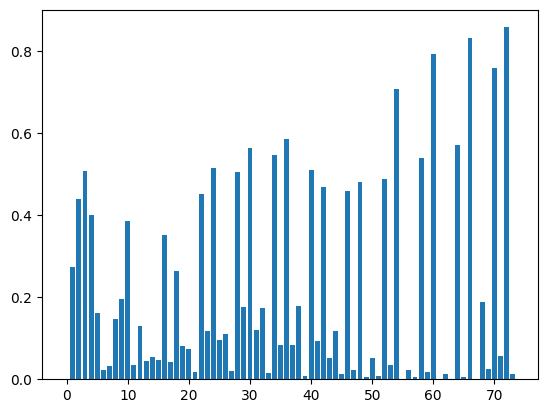

In [4]:
i=0
sp,s=0,0
ssf_scale,ssf_shift={},{}
ratio=[]
for name, para in model.named_parameters():
    if "ssf_scale" in name:
        ssf_scale[name]=para.data.detach().cpu().numpy()
        data=ssf_scale[name].flatten()
        pruned=np.sum(data < 1e-2)
        sp+=np.sum(data < 1e-2)
        s+=len(data)
        ratio.append(pruned/len(data))
        # print(f'{name:30} {pruned/len(data):.4f} {len(data)}')
    elif "ssf_shift" in name:
        i+=1
        ssf_shift[name]=para.data.detach().cpu().numpy()
    else:
        pass
print(i)
print(sp/s)
# print(ratio)
plt.bar([i for i in range(len(ratio))],ratio)

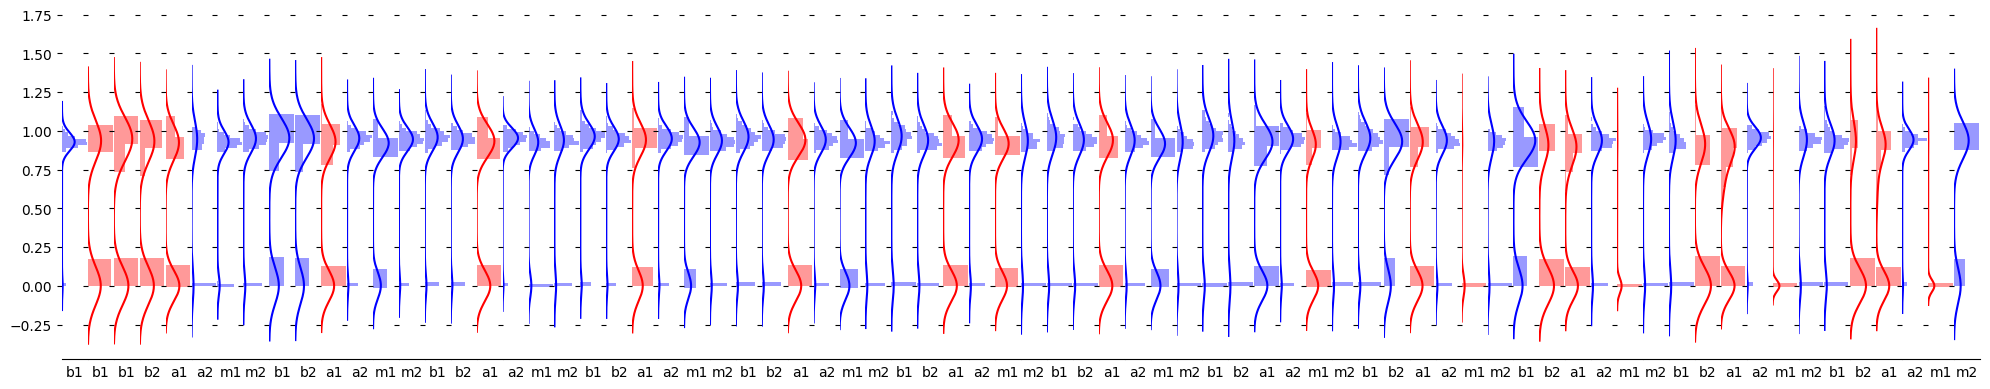

MAX Scale:  1.3727984
MIN Scale:  -0.0140269855
MAX Shift:  0.27836573
MIN Shift:  -0.2431707


In [5]:
import warnings
warnings. filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.models as models

def get_pratio(data):
    pruned=np.sum([data < 0.01])
    return pruned/len(data)

def draw6(row1,name=None):
    data=row1
    arr = data
    up_mean=np.mean(np.array([a.max() for a in arr]))
    lw_mean=np.mean(np.array([a.min() for a in arr]))
    num_rows = len(arr)
    fig, axs = plt.subplots(ncols=num_rows, nrows=1, sharey=True,gridspec_kw={"hspace": 0, "wspace": 0})
    fig.set_size_inches(20, 4)
    lw=lw_mean*1.5 if lw_mean<0 else lw_mean*0.5
    ran=(lw,up_mean*1.5)
    ran=(lw,up_mean*1.5)
    for i in range(num_rows):
        # sns.histplot(y=arr[i], ax=axs[i], kde=True, stat="density")
        # sns.distplot(arr[i], ax=axs[i], kde=True, stat="density",hist_kws={'range': (0.0, 0.2)})
        color="blue"
        # if arr[i].max() > up_mean*1.2 or arr[i].min() < lw_mean*0.8:
        #     color="red"
        if get_pratio(arr[i]) > 0.4:
            color="red"
        sns.distplot(arr[i], ax=axs[i], kde=True, vertical=True,color=color)
        # sns.distplot(arr[i], ax=axs[i], kde=True, vertical=True,color=color,\
        #     hist_kws={'range': ran},kde_kws={'clip': ran})
        # sns.histplot(data, clip=(0, 10))
        axs[i].set_xticks([])
        # axs[i].set_xlabel(f"{i+1}")
        label=""
        if 'attn' in name[i]:
            label+="a"
        elif 'mlp' in name[i]:
            label+="m"
        else:
            label+="b"
        label+=name[i].split("_")[-1]
        axs[i].set_xlabel(label)
    plt.tight_layout()
    # sns.set_style('white')
    sns.set(style='whitegrid')
    sns.despine(right=True,left=True)
    plt.show()
ssf_scale_list,ssf_shift_list,ssf_scale_name,ssf_shift_name=[],[],[],[]
for name, para in model.named_parameters():
    if "ssf_scale" in name:
        ssf_scale_list.append(para.data.detach().cpu().numpy())
        ssf_scale_name.append(name)
    elif "ssf_shift" in name:
        ssf_shift_list.append(para.data.detach().cpu().numpy())
        ssf_shift_name.append(name)
    else:
        pass
draw6(ssf_scale_list,ssf_scale_name)
# draw6(ssf_shift_list,ssf_shift_name)
print("MAX Scale: ", max([s.max() for s in ssf_scale_list]))
print("MIN Scale: ", min([s.min() for s in ssf_scale_list]))
print("MAX Shift: ", max([s.max() for s in ssf_shift_list]))
print("MIN Shift: ", min([s.min() for s in ssf_shift_list]))

In [7]:
i=0
sp,s=0,0
ssf_scale,ssf_shift={},{}
for name, para in model.named_parameters():
    if "ssf_scale" in name:
        ssf_scale[name]=para.data.detach().cpu().numpy()
        data=ssf_scale[name].flatten()
        pruned=np.sum(data < 1e-2)
        sp+=np.sum(data < 1e-2)
        s+=len(data)
        print(f'{name:30} {pruned/len(data):.4f} {len(data)}')
    elif "ssf_shift" in name:
        i+=1
        ssf_shift[name]=para.data.detach().cpu().numpy()
    else:
        pass
print(i)
print(sp/s)

ssf_scale_1                    0.0456 768
patch_embed.ssf_scale_1        0.4844 768
blocks.0.ssf_scale_1           0.4089 768
blocks.0.ssf_scale_2           0.4714 768
blocks.0.attn.ssf_scale_1      0.4701 2304
blocks.0.attn.ssf_scale_2      0.2474 768
blocks.0.mlp.ssf_scale_1       0.1452 3072
blocks.0.mlp.ssf_scale_2       0.1198 768
blocks.1.ssf_scale_1           0.3047 768
blocks.1.ssf_scale_2           0.3021 768
blocks.1.attn.ssf_scale_1      0.4431 2304
blocks.1.attn.ssf_scale_2      0.0898 768
blocks.1.mlp.ssf_scale_1       0.3018 3072
blocks.1.mlp.ssf_scale_2       0.0742 768
blocks.2.ssf_scale_1           0.0990 768
blocks.2.ssf_scale_2           0.1081 768
blocks.2.attn.ssf_scale_1      0.4149 2304
blocks.2.attn.ssf_scale_2      0.0456 768
blocks.2.mlp.ssf_scale_1       0.2067 3072
blocks.2.mlp.ssf_scale_2       0.1393 768
blocks.3.ssf_scale_1           0.0742 768
blocks.3.ssf_scale_2           0.0794 768
blocks.3.attn.ssf_scale_1      0.4128 2304
blocks.3.attn.ssf_scale_2  

In [22]:
i=0
for name, para in model.named_parameters():
    if 'ssf' not in name:
        print(f'{name:30},{para.numel():>7}')
        i+=1
print(i)

cls_token                     ,    768
pos_embed                     , 151296
patch_embed.proj.weight       , 589824
patch_embed.proj.bias         ,    768
blocks.0.norm1.weight         ,    768
blocks.0.norm1.bias           ,    768
blocks.0.attn.qkv.weight      ,1769472
blocks.0.attn.qkv.bias        ,   2304
blocks.0.attn.proj.weight     , 589824
blocks.0.attn.proj.bias       ,    768
blocks.0.norm2.weight         ,    768
blocks.0.norm2.bias           ,    768
blocks.0.mlp.fc1.weight       ,2359296
blocks.0.mlp.fc1.bias         ,   3072
blocks.0.mlp.fc2.weight       ,2359296
blocks.0.mlp.fc2.bias         ,    768
blocks.1.norm1.weight         ,    768
blocks.1.norm1.bias           ,    768
blocks.1.attn.qkv.weight      ,1769472
blocks.1.attn.qkv.bias        ,   2304
blocks.1.attn.proj.weight     , 589824
blocks.1.attn.proj.bias       ,    768
blocks.1.norm2.weight         ,    768
blocks.1.norm2.bias           ,    768
blocks.1.mlp.fc1.weight       ,2359296
blocks.1.mlp.fc1.bias    

In [5]:
for name, para in model.named_parameters():
    if "drop_path2" in name:
        print(f'{name:30}  {para.numel():6}')